<a href="https://colab.research.google.com/github/focccus/MVE550-Stochastic-processes/blob/main/A1/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the truncnorm package if not already installed
if (!requireNamespace("truncnorm", quietly = TRUE)) {
  install.packages("truncnorm")
}

# Load the package
library(truncnorm)
library(ggplot2)

## 1: Baysian Inference

In [ ]:
data <- c(12, 21, 12, 13, 11,19)  # Example data


# Compute parameters for posterior
alpha <- sum(data)         # Shape parameter
beta <- length(data)       # Rate parameter

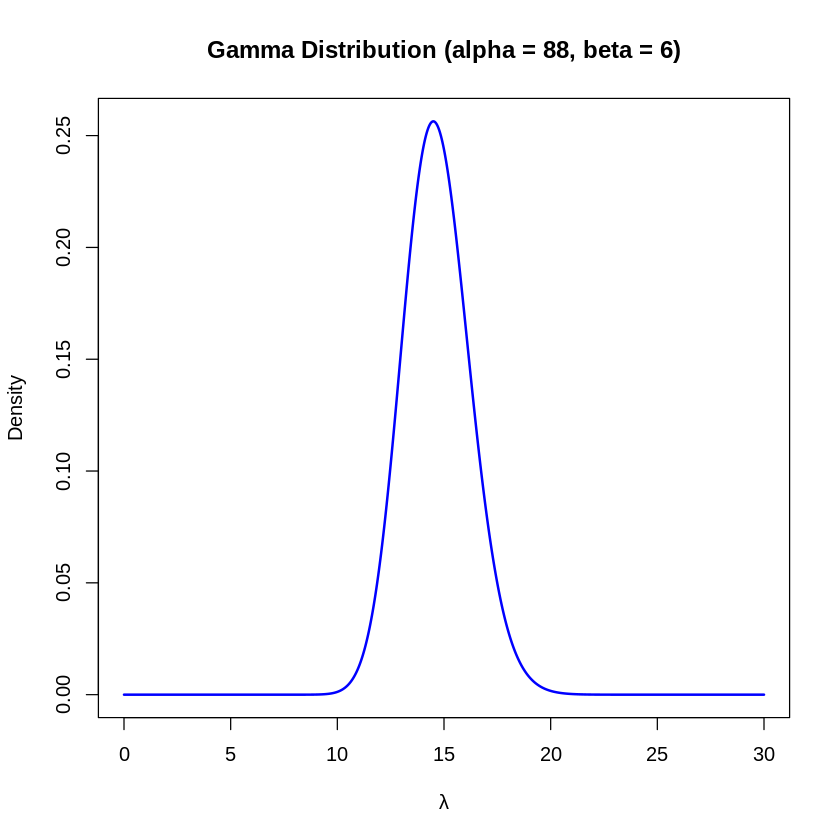

In [ ]:
# Set the parameters for the Gamma distribution

# Define a sequence of values for lambda (x-axis values)
lambda <- seq(0, 30, length.out = 1000)

# Calculate the density of the Gamma distribution
gamma_density <- dgamma(lambda, shape = alpha, rate = beta)

# Plot the Gamma distribution
plot(lambda, gamma_density, type = "l",
     main = "Gamma Distribution (alpha = 88, beta = 6)",
     xlab = expression(lambda),
     ylab = "Density",
     col = "blue", lwd = 2)


[1] 0.06320352


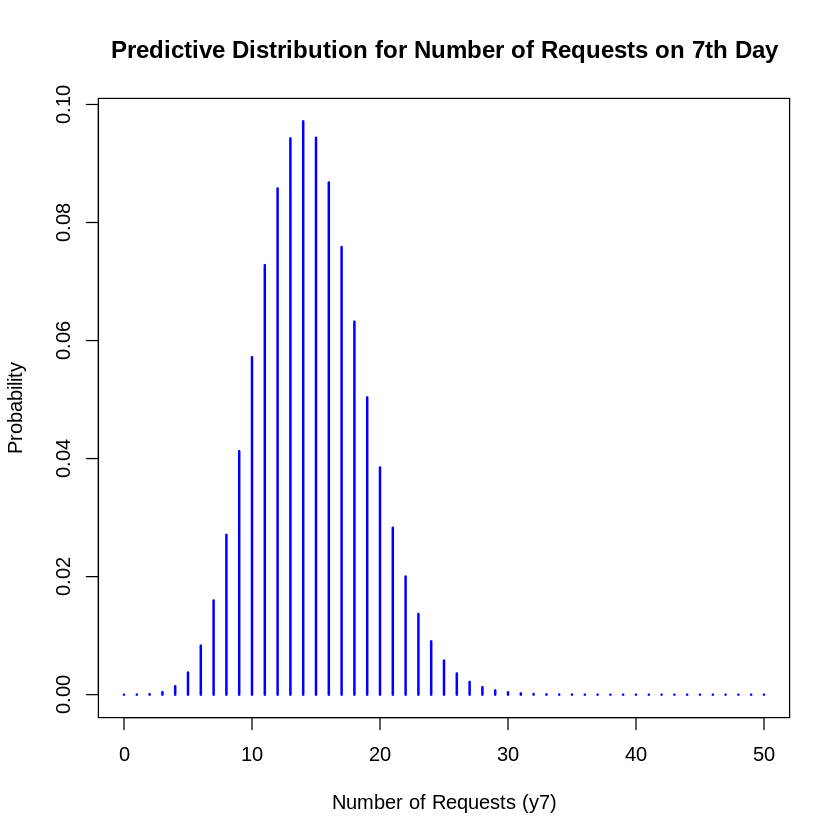

In [ ]:
# Set parameters for the Negative Binomial distribution
alpha <- 88
beta <- 6
p <- beta / (1 + beta)  # probability of success for Negative Binomial

# Generate values for y7 (number of requests)
y7_values <- 0:50  # range of possible values for requests on the 7th day

# Calculate the probability mass function for the Negative Binomial distribution
predictive_distribution <- dnbinom(y7_values, size = alpha, prob = p)

print(predictive_distribution[18+1])

# Plot the predictive distribution
plot(y7_values, predictive_distribution, type = "h",
     main = "Predictive Distribution for Number of Requests on 7th Day",
     xlab = "Number of Requests (y7)",
     ylab = "Probability",
     col = "blue", lwd = 2)


In [ ]:

# Number of discretization points
n_points <- 1000  # You can adjust this for higher accuracy

# Discretize the range of lambda
lambda_values <- seq(1, 30, length.out = n_points)  # Choose an appropriate range for lambda

In [ ]:
delta_lambda <- lambda_values[2]-lambda_values[1] # Calculate the step size
#prior_density <- dgamma(lambda_values, shape = 0, rate = 0)
prior_density <- 1/lambda_values
cat(prior_density)

1 0.9717899 0.9451277 0.9198895 0.8959641 0.8732517 0.8516624 0.8311148 0.8115353 0.7928571 0.7750194 0.7579666 0.7416481 0.7260174 0.711032 0.6966527 0.6828435 0.669571 0.6568047 0.6445161 0.6326789 0.6212687 0.6102627 0.5996399 0.5893805 0.5794664 0.5698802 0.5606061 0.5516289 0.5429348 0.5345104 0.5263435 0.5184224 0.5107362 0.5032746 0.4960278 0.4889868 0.4821429 0.4754879 0.4690141 0.4627142 0.4565814 0.4506089 0.4447907 0.4391209 0.4335938 0.428204 0.4229467 0.4178168 0.4128099 0.4079216 0.4031477 0.3984842 0.3939274 0.3894737 0.3851195 0.3808616 0.3766968 0.3726222 0.3686347 0.3647317 0.3609104 0.3571684 0.3535032 0.3499124 0.3463939 0.3429454 0.3395649 0.3362504 0.333 0.3298118 0.3266841 0.3236152 0.3206033 0.3176471 0.3147448 0.3118951 0.3090965 0.3063477 0.3036474 0.3009943 0.2983871 0.2958247 0.2933059 0.2908297 0.2883949 0.2860006 0.2836457 0.2813292 0.2790503 0.276808 0.2746014 0.2724298 0.2702922 0.2681879 0.2661161 0.2640761 0.2620672 0.2600885 0.2581395 0.2562195 0.2543

In [ ]:
cat(lambda_values)

1 1.029029 1.058058 1.087087 1.116116 1.145145 1.174174 1.203203 1.232232 1.261261 1.29029 1.319319 1.348348 1.377377 1.406406 1.435435 1.464464 1.493493 1.522523 1.551552 1.580581 1.60961 1.638639 1.667668 1.696697 1.725726 1.754755 1.783784 1.812813 1.841842 1.870871 1.8999 1.928929 1.957958 1.986987 2.016016 2.045045 2.074074 2.103103 2.132132 2.161161 2.19019 2.219219 2.248248 2.277277 2.306306 2.335335 2.364364 2.393393 2.422422 2.451451 2.48048 2.50951 2.538539 2.567568 2.596597 2.625626 2.654655 2.683684 2.712713 2.741742 2.770771 2.7998 2.828829 2.857858 2.886887 2.915916 2.944945 2.973974 3.003003 3.032032 3.061061 3.09009 3.119119 3.148148 3.177177 3.206206 3.235235 3.264264 3.293293 3.322322 3.351351 3.38038 3.409409 3.438438 3.467467 3.496496 3.525526 3.554555 3.583584 3.612613 3.641642 3.670671 3.6997 3.728729 3.757758 3.786787 3.815816 3.844845 3.873874 3.902903 3.931932 3.960961 3.98999 4.019019 4.048048 4.077077 4.106106 4.135135 4.164164 4.193193 4.222222 4.251251 4.28

In [ ]:
likelihood_density <- sapply(lambda_values, function(l) prod(dpois(data, lambda = l)))
print(likelihood_density)

   [1] 6.993340e-75 7.289082e-74 7.083286e-73 6.441954e-72 5.502226e-71
   [6] 4.427896e-70 3.367359e-69 2.426692e-68 1.661450e-67 1.083287e-66
  [11] 6.741391e-66 4.012417e-65 2.288524e-64 1.253102e-63 6.598388e-63
  [16] 3.346599e-62 1.637330e-61 7.738363e-61 3.537697e-60 1.566377e-59
  [21] 6.724987e-59 2.802806e-58 1.135173e-57 4.472343e-57 1.715640e-56
  [26] 6.413995e-56 2.338920e-55 8.326096e-55 2.895640e-54 9.845697e-54
  [31] 3.275320e-53 1.066740e-52 3.403614e-52 1.064548e-51 3.265793e-51
  [36] 9.832270e-51 2.906659e-50 8.441762e-50 2.409821e-49 6.764790e-49
  [41] 1.868267e-48 5.078406e-48 1.359257e-47 3.583735e-47 9.311038e-47
  [46] 2.384788e-46 6.023460e-46 1.500848e-45 3.690337e-45 8.957207e-45
  [51] 2.146795e-44 5.082170e-44 1.188702e-43 2.747785e-43 6.279058e-43
  [56] 1.418798e-42 3.170807e-42 7.010469e-42 1.533748e-41 3.321155e-41
  [61] 7.119468e-41 1.511198e-40 3.176874e-40 6.615610e-40 1.364945e-39
  [66] 2.790723e-39 5.655279e-39 1.136065e-38 2.262763e-38 4.469

In [ ]:
posterior_density <- likelihood_density * prior_density
posterior_density<-posterior_density/sum(posterior_density)
# Print the result
cat("discritized posterior is :", posterior_density, "\n")

discritized posterior is : 1.024602e-68 1.037805e-67 9.808344e-67 8.682079e-66 7.222699e-65 5.665096e-64 4.201722e-63 2.954922e-62 1.975446e-61 1.258372e-60 7.654777e-60 4.455809e-59 2.486702e-58 1.332919e-57 6.873808e-57 3.415785e-56 1.638053e-55 7.5913e-55 3.404296e-54 1.47911e-53 6.23369e-53 2.551191e-52 1.014961e-51 3.929127e-51 1.481469e-50 5.445368e-50 1.952852e-49 6.838638e-49 2.340249e-48 7.831854e-48 2.564958e-47 8.226182e-47 2.585202e-46 7.965856e-46 2.408042e-45 7.145461e-45 2.082388e-44 5.963198e-44 1.678783e-43 4.648477e-43 1.266549e-42 3.39716e-42 8.973705e-42 2.335404e-41 5.990356e-41 1.514967e-40 3.778916e-40 9.300211e-40 2.259032e-39 5.417428e-39 1.283033e-38 3.001814e-38 6.939924e-38 1.585877e-37 3.582969e-37 8.005465e-37 1.769324e-36 3.869096e-36 8.373233e-36 1.793725e-35 3.804446e-35 7.990817e-35 1.66243e-34 3.426365e-34 6.997532e-34 1.416307e-33 2.841512e-33 5.651927e-33 1.114737e-32 2.180459e-32 4.230508e-32 8.1428e-32 1.555094e-31 2.94717e-31 5.543458e-31 1.03500

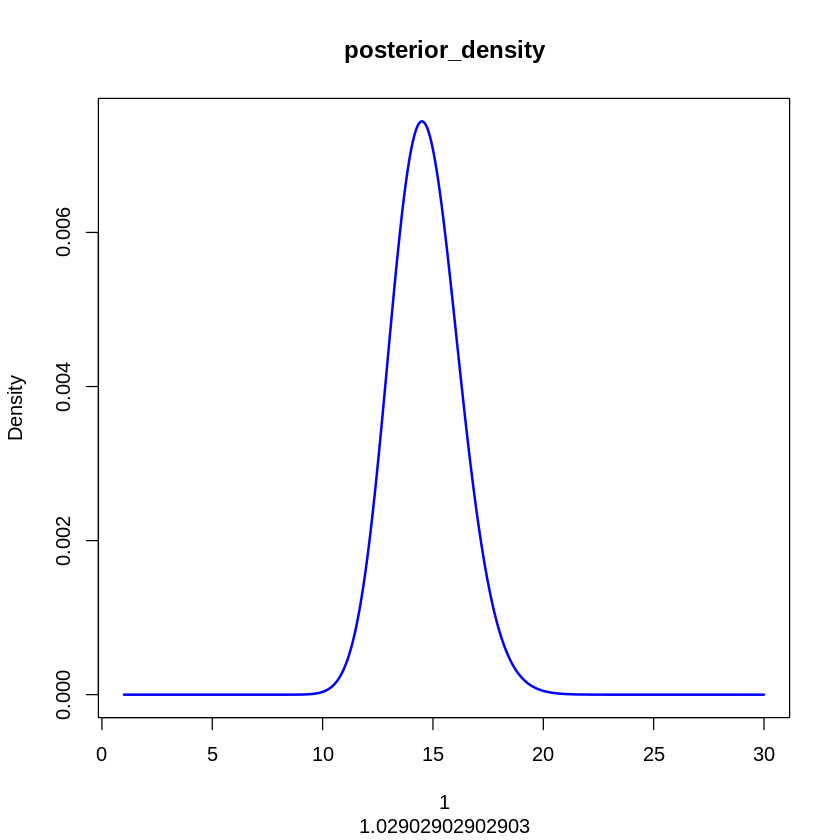

In [ ]:
# Plot the Gamma distribution
plot(lambda_values, posterior_density, type = "l",
     main = "posterior_density",
     xlab = lambda_values,
     ylab = "Density",
     col = "blue", lwd = 2)

In [ ]:
#posterior_density <- dgamma(lambda_values, shape = alpha, rate = beta)

y7 <- 18
predictive_probabilities <- dpois(y7, lambda = lambda_values)

# Compute the weighted sum to approximate the predictive probability
predictive_distribution <- sum(predictive_probabilities * posterior_density)

# Print the result
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution, "\n")


Approximate probability of exactly 18 requests on the 7th day: 0.06320352 


11.35267 16.44004 12.25227 14.68195 12.12602 17.1312 13.83754 16.77269 14.92503 14.70843 17.42036 15.5468 16.08829 16.84671 16.06135 16.31568 15.00642 14.76773 16.64213 19.39543 14.02007 16.05689 16.72373 17.0531 12.64323 14.55221 16.75578 13.47553 14.44356 16.4532 16.09699 15.27655 11.91986 15.3972 12.95517 14.31338 11.30578 13.40615 15.44955 16.61939 15.31988 13.97633 16.73627 11.57324 14.31421 15.78413 17.13071 13.37777 16.78293 14.45728 12.66707 15.22269 15.16448 14.42191 14.77685 14.28837 15.29553 14.88141 13.72053 15.72605 16.48911 16.35667 17.6097 12.02087 15.4427 14.32339 11.23198 13.9239 13.57483 15.96833 16.27923 14.92966 15.3957 13.36671 12.4846 17.10053 11.14342 16.10676 16.56522 12.75431 14.23073 13.7051 15.90566 13.43559 13.47467 13.72269 13.28392 17.21335 14.52442 14.50313 12.84371 12.85402 14.57347 11.98433 12.35906 15.54499 13.60661 14.65749 14.65595 11.96549 15.30067 16.09623 11.57502 17.83139 15.42428 17.30278 16.77254 17.42205 14.18009 16.51689 16.83326 14.5461 13.0

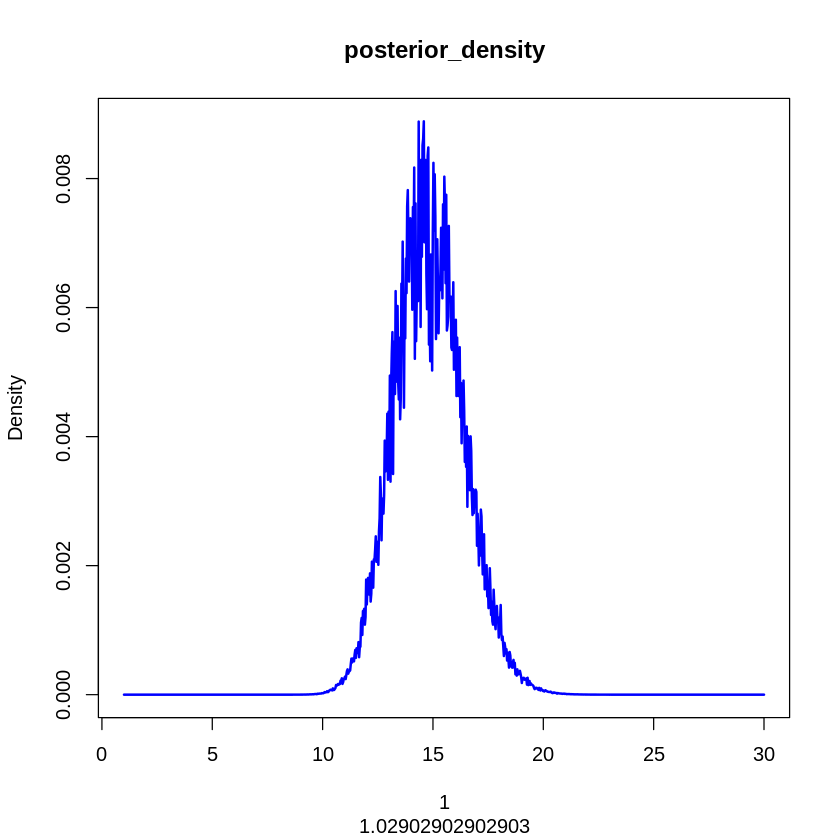

In [ ]:
mean <- 15
sd <- 2
lower <- 0 # Restrict to positive values
upper <- Inf # No upper limit

normal_prior_density <- rtruncnorm(n = n_points, a = lower, b = upper, mean = mean, sd = sd)
cat(normal_prior_density)

likelihood_density <- sapply(lambda_values, function(l) prod(dpois(data, lambda = l)))
print(likelihood_density)

posterior_density <- likelihood_density * normal_prior_density
posterior_density<-posterior_density/sum(posterior_density)

# Print the result
cat("discritized posterior is :", posterior_density, "\n")

plot(lambda_values, posterior_density, type = "l",
     main = "posterior_density",
     xlab = lambda_values,
     ylab = "Density",
     col = "blue", lwd = 2)

y7 <- 18
predictive_probabilities <- dpois(y7, lambda = lambda_values)

# Compute the weighted sum to approximate the predictive probability
predictive_distribution <- sum(predictive_probabilities * posterior_density)

# Print the result
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution, "\n")

[1] 6.993340e-75 7.289082e-74 7.083286e-73 6.441954e-72 5.502226e-71
   [6] 4.427896e-70 3.367359e-69 2.426692e-68 1.661450e-67 1.083287e-66
  [11] 6.741391e-66 4.012417e-65 2.288524e-64 1.253102e-63 6.598388e-63
  [16] 3.346599e-62 1.637330e-61 7.738363e-61 3.537697e-60 1.566377e-59
  [21] 6.724987e-59 2.802806e-58 1.135173e-57 4.472343e-57 1.715640e-56
  [26] 6.413995e-56 2.338920e-55 8.326096e-55 2.895640e-54 9.845697e-54
  [31] 3.275320e-53 1.066740e-52 3.403614e-52 1.064548e-51 3.265793e-51
  [36] 9.832270e-51 2.906659e-50 8.441762e-50 2.409821e-49 6.764790e-49
  [41] 1.868267e-48 5.078406e-48 1.359257e-47 3.583735e-47 9.311038e-47
  [46] 2.384788e-46 6.023460e-46 1.500848e-45 3.690337e-45 8.957207e-45
  [51] 2.146795e-44 5.082170e-44 1.188702e-43 2.747785e-43 6.279058e-43
  [56] 1.418798e-42 3.170807e-42 7.010469e-42 1.533748e-41 3.321155e-41
  [61] 7.119468e-41 1.511198e-40 3.176874e-40 6.615610e-40 1.364945e-39
  [66] 2.790723e-39 5.655279e-39 1.136065e-38 2.262763e-38 4.469235e-38
  [71] 8.754995e-38 1.701278e-37 3.279876e-37 6.274321e-37 1.191147e-36
  [76] 2.244474e-36 4.198297e-36 7.796482e-36 1.437630e-35 2.632528e-35
  [81] 4.787725e-35 8.649036e-35 1.552168e-34 2.767522e-34 4.903122e-34
  [86] 8.632376e-34 1.510460e-33 2.626962e-33 4.541582e-33 7.805692e-33
  [91] 1.333853e-32 2.266399e-32 3.829451e-32 6.434966e-32 1.075482e-31
  [96] 1.787901e-31 2.956671e-31 4.864257e-31 7.961927e-31 1.296705e-30
 [101] 2.101445e-30 3.389071e-30 5.439513e-30 8.689337e-30 1.381625e-29
 [106] 2.186754e-29 3.445436e-29 5.404443e-29 8.440098e-29 1.312383e-28
 [111] 2.031965e-28 3.132855e-28 4.810140e-28 7.355178e-28 1.120136e-27
 [116] 1.699080e-27 2.567119e-27 3.863577e-27 5.792510e-27 8.651663e-27
 [121] 1.287387e-26 1.908608e-26 2.819308e-26 4.149606e-26 6.085967e-26
 [126] 8.894672e-26 1.295469e-25 1.880354e-25 2.720106e-25 3.921786e-25
 [131] 5.635744e-25 8.072452e-25 1.152560e-24 1.640370e-24 2.327327e-24
 [136] 3.291743e-24 4.641553e-24 6.525071e-24 9.145491e-24 1.278038e-23
 [141] 1.780778e-23 2.474117e-23 3.427591e-23 4.735112e-23 6.523155e-23
 [146] 8.961588e-23 1.227794e-22 1.677614e-22 2.286115e-22 3.107104e-22
 [151] 4.211898e-22 5.694775e-22 7.680049e-22 1.033123e-21 1.386284e-21
 [156] 1.855566e-21 2.477626e-21 3.300208e-21 4.385349e-21 5.813465e-21
 [161] 7.688555e-21 1.014480e-20 1.335494e-20 1.754082e-20 2.298676e-20
 [166] 3.005627e-20 3.921313e-20 5.104778e-20 6.631021e-20 8.595111e-20
 [171] 1.111730e-19 1.434936e-19 1.848249e-19 2.375701e-19 3.047438e-19
 [176] 3.901202e-19 4.984147e-19 6.355069e-19 8.087139e-19 1.027124e-18
 [181] 1.302002e-18 1.647289e-18 2.080196e-18 2.621942e-18 3.298631e-18
 [186] 4.142318e-18 5.192296e-18 6.496644e-18 8.114082e-18 1.011620e-17
 [191] 1.259012e-17 1.564169e-17 1.939928e-17 2.401830e-17 2.968657e-17
 [196] 3.663073e-17 4.512375e-17 5.549389e-17 6.813522e-17 8.352007e-17
 [201] 1.022136e-16 1.248910e-16 1.523577e-16 1.855727e-16 2.256762e-16
 [206] 2.740220e-16 3.322143e-16 4.021521e-16 4.860788e-16 5.866416e-16
 [211] 7.069589e-16 8.506991e-16 1.022170e-15 1.226426e-15 1.469384e-15
 [216] 1.757965e-15 2.100249e-15 2.505660e-15 2.985170e-15 3.551536e-15
 [221] 4.219572e-15 5.006454e-15 5.932073e-15 7.019425e-15 8.295069e-15
 [226] 9.789630e-15 1.153838e-14 1.358188e-14 1.596673e-14 1.874636e-14
 [231] 2.198202e-14 2.574373e-14 3.011155e-14 3.517681e-14 4.104359e-14
 [236] 4.783040e-14 5.567193e-14 6.472111e-14 7.515139e-14 8.715918e-14
 [241] 1.009667e-13 1.168250e-13 1.350174e-13 1.558632e-13 1.797219e-13
 [246] 2.069977e-13 2.381444e-13 2.736715e-13 3.141494e-13 3.602167e-13
 [251] 4.125871e-13 4.720579e-13 5.395177e-13 6.159571e-13 7.024778e-13
 [256] 8.003049e-13 9.107981e-13 1.035466e-12 1.175979e-12 1.334186e-12
 [261] 1.512131e-12 1.712070e-12 1.936493e-12 2.188142e-12 2.470034e-12
 [266] 2.785489e-12 3.138150e-12 3.532015e-12 3.971466e-12 4.461299e-12
 [271] 5.006760e-12 5.613580e-12 6.288013e-12 7.036876e-12 7.867597e-12
 [276] 8.788255e-12 9.807629e-12 1.093525e-

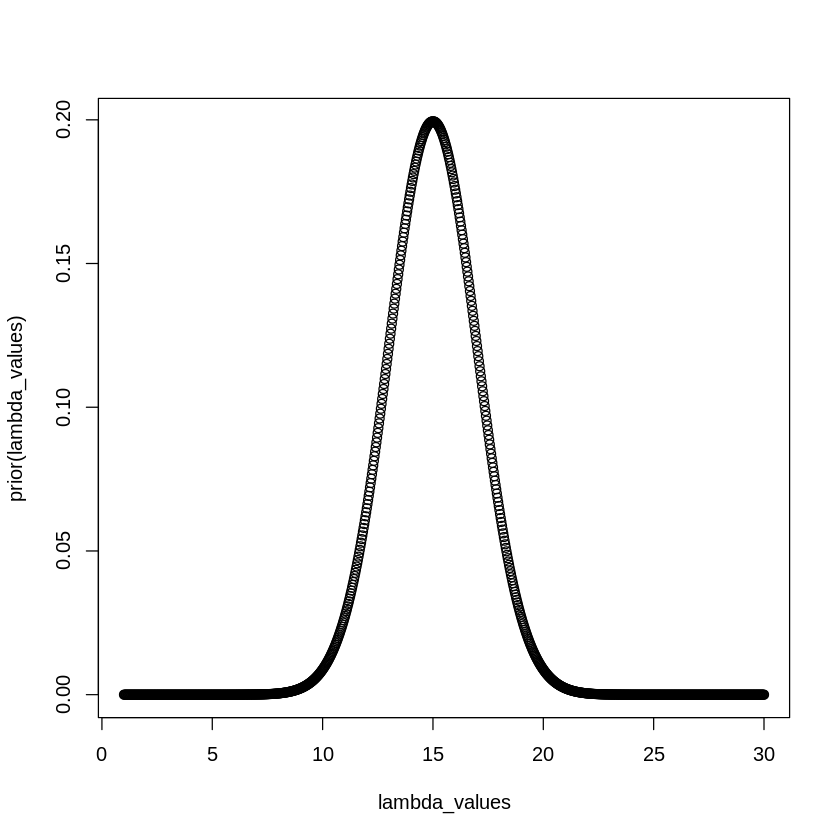

In [ ]:
# Likelihood function: product of Poisson densities
upper <- Inf # No upper limit

likelihood <- function(lambda) {
sapply(lambda, function(l) prod(dpois(data, lambda = l))
)}

likelihood_density


# Truncated normal prior density function
prior <- function(lambda) {
  ifelse(lambda >= lower & lambda <= upper, dnorm(lambda, mean = mean, sd = sd), 0)
}

plot(lambda_values,prior(lambda_values))

In [ ]:
# Posterior density function
posterior <- function(lambda) {
  likelihood(lambda) * prior(lambda)
}

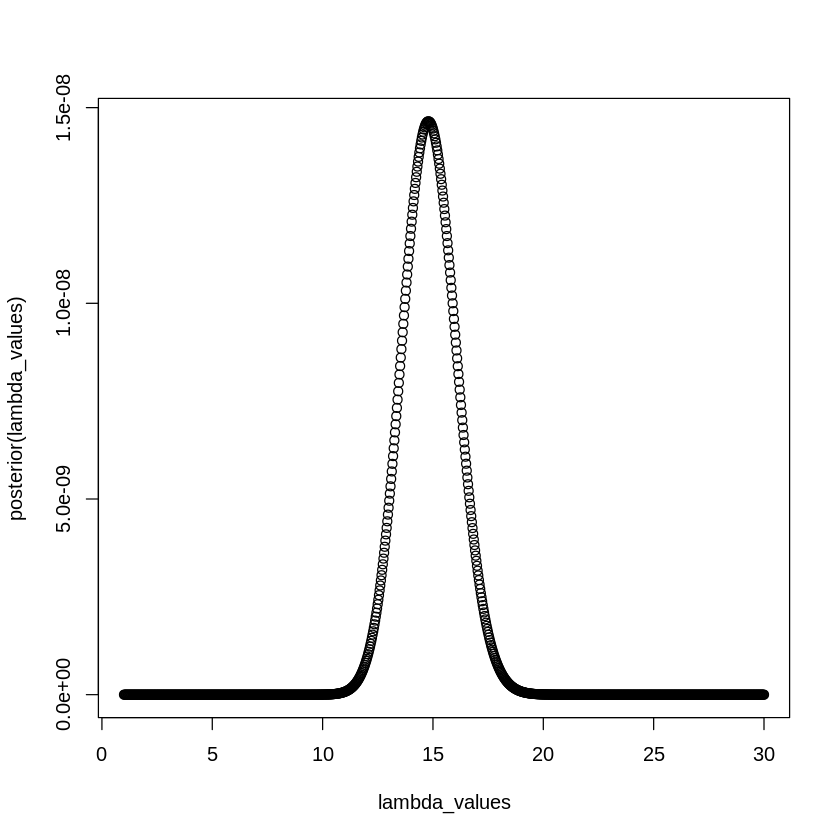

In [ ]:
plot(lambda_values,posterior(lambda_values))

In [ ]:
# Normalizing constant (integral of the posterior)
normalizing_constant <- integrate(posterior, lower = lower, upper = upper)$value
normalizing_constant

[1] 2.295908e-08

In [ ]:
# Normalized posterior density
normalized_posterior <- function(lambda) {
  posterior(lambda) / normalizing_constant
}

# Predictive probability for y7 = 18
y7 <- 18
predictive_probability <- function(lambda) {
  dpois(y7, lambda) * normalized_posterior(lambda)
}

# Compute the predictive distribution via integration
predictive_distribution <- integrate(predictive_probability, lower = lower, upper = upper)$value

# Results
cat("Normalizing constant:", normalizing_constant, "\n")
cat("Approximate probability of exactly 18 requests on the 7th day:", predictive_distribution, "\n")

Normalizing constant: 2.295908e-08 
Approximate probability of exactly 18 requests on the 7th day: 0.13201 


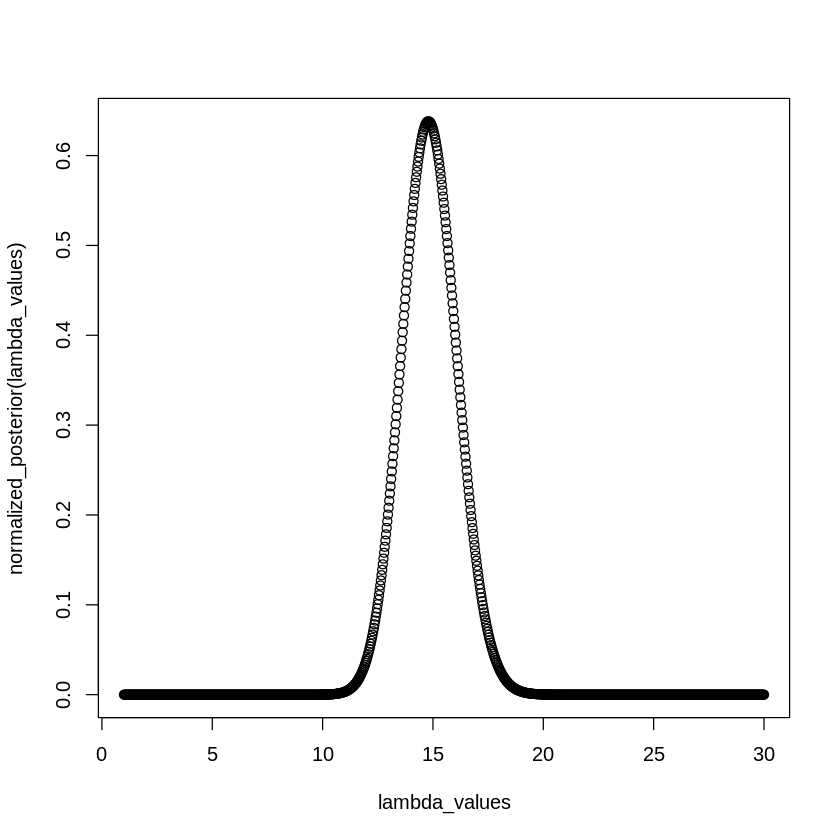

In [ ]:
plot(lambda_values,normalized_posterior(lambda_values))

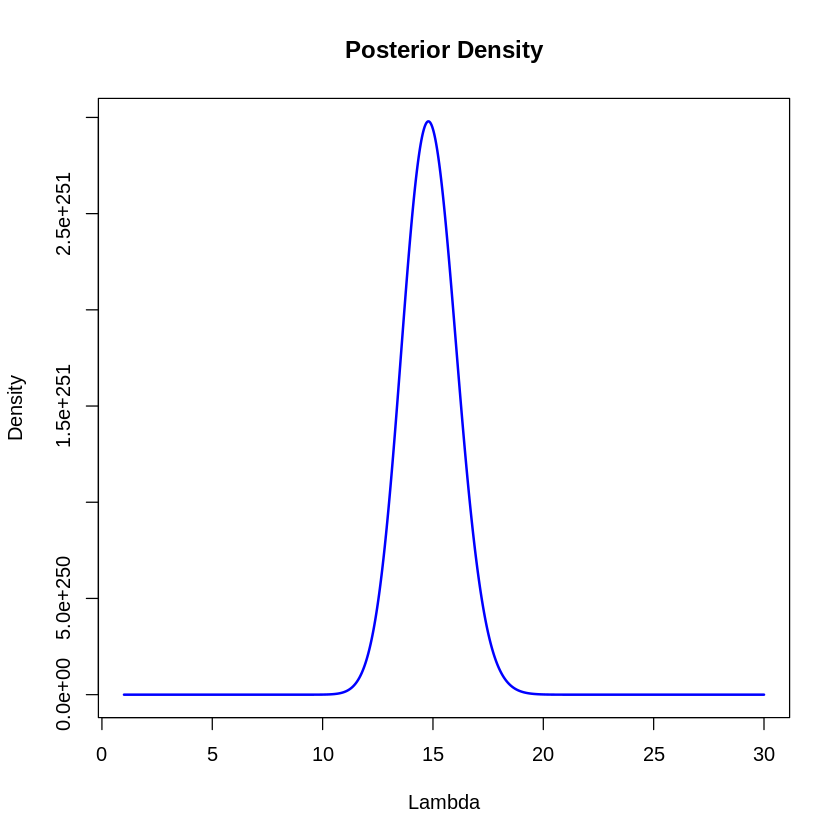

In [ ]:
# Plot the posterior density
posterior_values <- sapply(lambda_values, normalized_posterior)

plot(lambda_values, posterior_values, type = "l",
     main = "Posterior Density",
     xlab = "Lambda",
     ylab = "Density",
     col = "blue", lwd = 2)


## 2: Markov Chain
![graph](https://github.com/focccus/MVE550-Stochastic-processes/blob/main/A1/graph.png?raw=1)


A)

In [ ]:


Q_a <- matrix(c(0, 1, 1, 1, 1,
              0, 1, 1, 1, 1,
              0, 1, 0, 1, 1, # + 1/4 probability to 6
              0, 2, 0, 0, 1, # + 1/4 probability to 6
              0, 2, 1, 0, 0 # + 1/4 probability to 6
              ), 5, 5, byrow=T)/4

R_a <- c(0, 0, 1, 1, 1)/4
F_a <- solve(diag(5)-Q_a)
print(F_a)

     [,1]     [,2]      [,3]      [,4]     [,5]
[1,]    1 2.575758 1.2727273 1.2121212 1.515152
[2,]    0 3.575758 1.2727273 1.2121212 1.515152
[3,]    0 2.060606 1.8181818 0.9696970 1.212121
[4,]    0 2.363636 0.9090909 1.8181818 1.272727
[5,]    0 2.303030 1.0909091 0.8484848 2.060606


In [ ]:
# Probability of absorbtion (should be 1)
print(F_a%*%R_a)

     [,1]
[1,]    1
[2,]    1
[3,]    1
[4,]    1
[5,]    1


In [ ]:
# Expected number of steps to absorbtion is given by first element of F1
expected_number_of_steps_to_absorb_in_state_6 = F_a%*%rep(1, 5)
# expected number of throws to end up in state 6 starting in state 0
print(expected_number_of_steps_to_absorb_in_state_6[1])

[1] 7.575758


B)

In [ ]:
Q_b <- matrix(c(0, 1, 1, 1,
              0, 1, 1, 1,
              0, 1, 0, 1, # + 1/4 probability to 6
              0, 2, 1, 0 # + 1/4 probability to 6
              ), 4, 4, byrow=T)/4

R_b <- matrix(c(0, 1,

              0, 1,
              1, 1, # + 1/4 probability to 6
              1, 0 # + 1/4 probability to 6
              ), 4, 2, byrow=T)/4

In [ ]:
## Modified Chain with 3 as absorbing state
F_b <- solve(diag(4)-Q_b)

# Probability of absorbtion (should be 1)
probabilty_of_absorbtion = F_b%*%R_b
print(probabilty_of_absorbtion)
probabilty_of_visiting_state_3 = probabilty_of_absorbtion[1, 2]
print(probabilty_of_visiting_state_3)

          [,1]      [,2]
[1,] 0.3333333 0.6666667
[2,] 0.3333333 0.6666667
[3,] 0.4666667 0.5333333
[4,] 0.5333333 0.4666667
[1] 0.6666667


C)

In [ ]:
# P(V = 1) = P(visit 3 at least once) P(visit 3 never again when starting in 3) =
# P(visit 3 at least once) (1/4 + 1/4 P(visit 3 never again when starting in 4)+ 2/4 P(visit 3 never again when starting in 1)

probability_of_never_visiting_state_3 = 1/4 + 1/4*probabilty_of_absorbtion[4,1] + 2/4*probabilty_of_absorbtion[3,1]
probability_of_visiting_state_3_exactly_once = probabilty_of_visiting_state_3 * probability_of_never_visiting_state_3

#
probability_of_visiting_state_3_two_or_more_times = probabilty_of_visiting_state_3 - probability_of_visiting_state_3_exactly_once
print(probability_of_visiting_state_3_two_or_more_times)

[1] 0.2555556
